In [3]:
import pandas as pd
import seaborn as sns

Procesing time collected from Bayes

In [12]:
df = pd.read_excel('job-times.xlsx')
print(df)

   Processers    Time
0           1  2.9500
1           2  1.4615
2           4  0.7630
3           8  0.4340
4          16  0.3490
5          32  0.2750


In [32]:
def speedup(n):
    """
    Calculates speed up using Amdahl's law.
    :param n: number of processors
    :return: Theoretical speedup proprotional to the size of parallelizable code.
    """
    p = 1 # parallel percentage
    s = (1-p) # serial percentage
    return 1/(s + (p/n))



Theorictal speedup

In [51]:
t_speed_up = list(map(speedup, [1, 2, 4, 8, 16, 32]))
nl = '\n'
print(f'Theorictal Speed-up {nl} {t_speed_up}' )

Theorictal Speed-up 
 [1.0, 2.0, 4.0, 8.0, 16.0, 32.0]


In [46]:
performance = df['Time']
speed_up_real = lambda per: per[0]/per # ratio 
actual_speed_up = speed_up_real(performance)
nl = '\n'
print(f'Actual speed up {nl}{actual_speed_up}')

Actual speed up 
0     1.000000
1     2.018474
2     3.866317
3     6.797235
4     8.452722
5    10.727273
Name: Time, dtype: float64


<AxesSubplot:xlabel='Processers', ylabel='Time'>

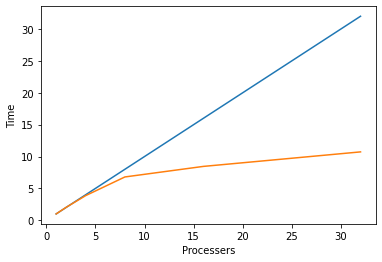

In [52]:
sns.lineplot(data=df, x="Processers", y=t_speed_up)
sns.lineplot(data=df, x="Processers", y=r_speed_up)
# if 50% serial code is 50% then speed up is never more than 2.